In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import
import pickle as pk
import matplotlib.pyplot as plt

In [3]:
# import MLR input vars

# note: these are only one time step
with open('SODA_inputs.p', 'rb') as f:
    salt_south1, salt_east1, ist_south, ist_east = pk.load(f)
    
#print(salt_east.shape)

# import spatial vars
with open('BC_depth.p', 'rb') as f:
    depth_south, depth_east = pk.load(f)

with open('BC_coords.p', 'rb') as f:
    lon_south, lon_east, lat_south, lat_east = pk.load(f)

# normalize variables

In [4]:
Tmean = 13.1856
Tstd = 5.1979

Tn_south = (ist_south-Tmean)/Tstd
Tn_east = (ist_east-Tmean)/Tstd

Smean = 34.4037
Sstd = 1.4914

Sn_south = (salt_south1-Smean)/Sstd
Sn_east = (salt_east1-Smean)/Sstd

In [5]:
# pickle normalized variables
with open('phys_inputs_norm.p', 'wb') as f:
    pk.dump([Tn_south, Tn_east, Sn_south, Sn_east], f)

# plot to check normalized

Text(0.5, 1.0, 'practical salinity east')

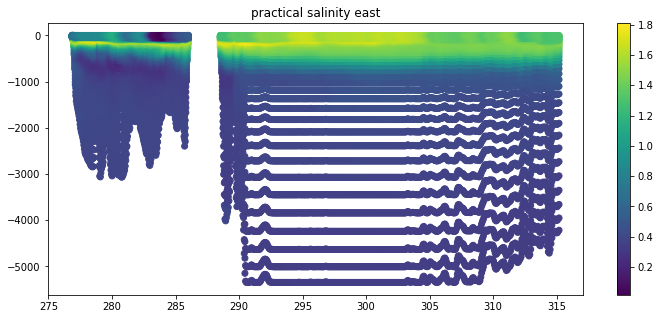

In [6]:
fig = plt.figure(figsize=(12,5))

#plt.scatter(lon_east, depth_east, marker='o', c=Sn_east)
#plt.scatter(lon_east, depth_east, marker='o', c=Tn_east)
#plt.scatter(lon_south, depth_south, marker='o', c=Tn_south)
plt.scatter(lon_south, depth_south, marker='o', c=Sn_south)

plt.colorbar()
plt.title("practical salinity east")

# calculate DIC and TA

In [7]:
# equation coefficients

# DIC coefficients
a0=2103.3
a1=-56.408
a2=58.347
a3=-7.2612

# TA coeffficients
b0=2289.4;
b1=0.75761;
b2=69.15;

# MLR equations
DIC_south = a0 + a1*Tn_south + a2*Sn_south + a3*Tn_south*Sn_south
DIC_east = a0 + a1*Tn_east + a2*Sn_east + a3*Tn_east*Sn_east

TA_south = b0 + b1*Tn_south + b2*Sn_south
TA_east = b0 + b1*Tn_east + b2*Sn_east

# plot to check MLR TA and DIC

Text(0.5, 1.0, 'TA east')

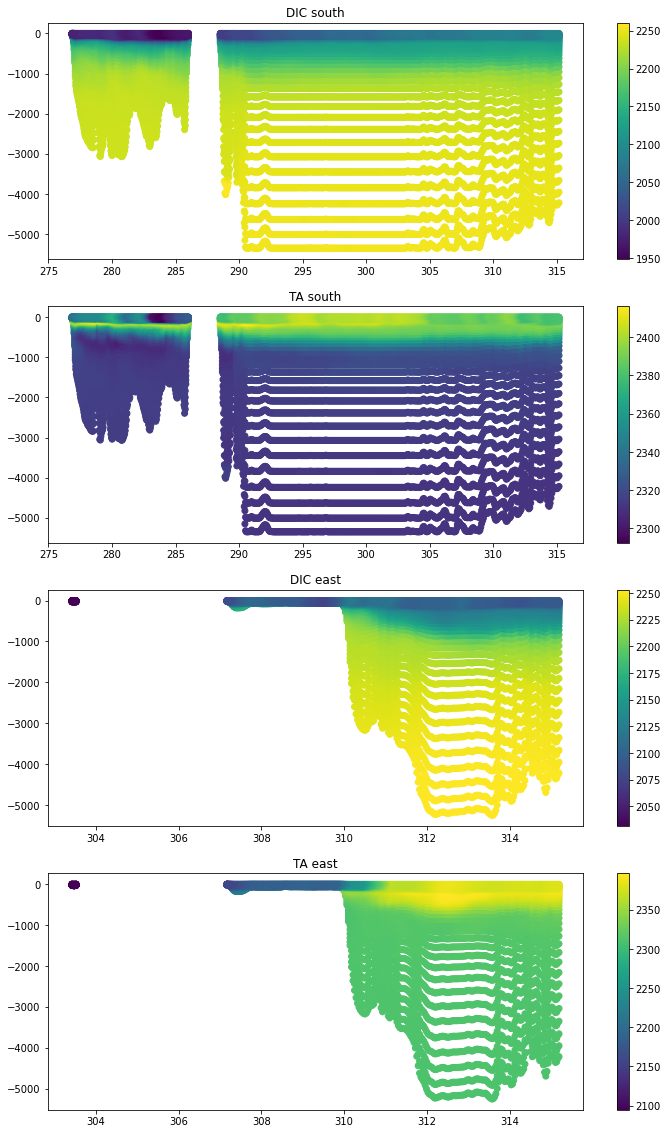

In [8]:
fig = plt.figure(figsize=(12,20))

ax = fig.add_subplot(411)
plt.scatter(lon_south, depth_south, marker='o', c=DIC_south)
plt.colorbar()
plt.title("DIC south")

ax = fig.add_subplot(412)
plt.scatter(lon_south, depth_south, marker='o', c=TA_south)
plt.colorbar()
plt.title("TA south")

ax = fig.add_subplot(413)
plt.scatter(lon_east, depth_east, marker='o', c=DIC_east)
plt.colorbar()
plt.title("DIC east")

ax=fig.add_subplot(414)
plt.scatter(lon_east, depth_east, marker='o', c=TA_east)
plt.colorbar()
plt.title("TA east")